# Pymaceuticals Inc.
---

### Analysis
* The trial subject set is almost evenly distributed between male and female subjects.
* Capomulin and Ramicane has the two most number of test timepoints.
* Data statistics shows that Capomulin and Ramican provided the two best results in terms of tumor volume variance, tumor volume standard error and tumor volume standard error of the mean values.
* The Capomulin regimen shows effectvity in treating the cancer cell in Mouse ID: b128, as shown in the decrease of the tumor volume over the trial period.
* The Capomulin Regimen data shows a strong correlation between the Average Tumor Volume and the test subject's weight.


In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left", sort = False)

In [2]:
# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
test_subj_count = merged_data_df["Mouse ID"].nunique()
test_subj_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find the entrees with duplicate "Mouse ID" & "Timepoint" values 
search_for_duplicates_df = merged_data_df.copy()
duplicates_boolean = search_for_duplicates_df.duplicated(["Mouse ID","Timepoint"])
# Create list containing the Index numbers of the duplicates
duplicate_index_list = []
counter = 0
for row in duplicates_boolean:
    if row == True:
        duplicate_index_list.append(counter)
    counter = counter + 1
# Create a list of the duplicate Mouse IDs using the generated index list
duplicate_list = []
for index in duplicate_index_list:
    duplicate_list.append(merged_data_df.iloc[index,0])
# Identify "Mouse ID" with duplicate "Timepoint" values
duplicated_ID = list(dict.fromkeys(duplicate_list))
duplicated_ID

['g989']

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = duplicated_ID[0]
duplicated_ID_info_df = merged_data_df.loc[merged_data_df["Mouse ID"] == duplicate, :]
duplicated_ID_info_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data_df.loc[merged_data_df["Mouse ID"] != duplicate, :]
clean_data_df = clean_data_df.reset_index(drop=True)
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
test_subj_count_clean_data = clean_data_df["Mouse ID"].nunique()
test_subj_count_clean_data

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# GroupBy "Drug Regimen"
grouped_by_drug_regimen = clean_data_df.groupby("Drug Regimen")

# Calculate mean values
drug_regimen_mean = grouped_by_drug_regimen["Tumor Volume (mm3)"].mean()
# Calculate median values
drug_regimen_median = grouped_by_drug_regimen["Tumor Volume (mm3)"].median()
# Calculate variance values
drug_regimen_variance = grouped_by_drug_regimen["Tumor Volume (mm3)"].var()
# Calculate standard deviation values
drug_regimen_stddev = grouped_by_drug_regimen["Tumor Volume (mm3)"].std()
# Calculate standard error of mean values
drug_regimen_sem = grouped_by_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_drug_by_group_df = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                         "Median Tumor Volume": drug_regimen_median,
                                         "Tumor Volume Variance": drug_regimen_variance,
                                         "Tumor Volume Std. Dev.": drug_regimen_stddev,
                                         "Tumor Volume Std. Err.": drug_regimen_sem})
summary_drug_by_group_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = grouped_by_drug_regimen.agg({"Tumor Volume (mm3)":["mean", "median","var","std", "sem"]})
drug_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

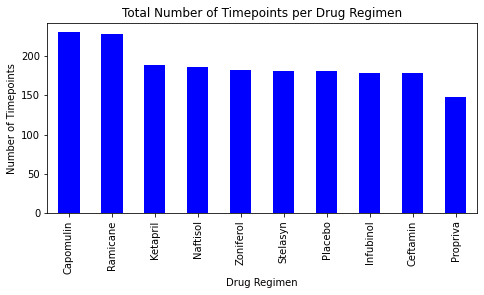

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.

# Create dataframe based on "Mouse ID" and "Drug Regimen" 
mouse_to_drug_df = clean_data_df[["Mouse ID", "Drug Regimen"]]
# Create dataframe based on total number of timepoints for all mice tested for each drug regimen
drug_test_count_df = pd.DataFrame(mouse_to_drug_df["Drug Regimen"].value_counts())
# Convert index column to usable data column
drug_test_count_df.reset_index(level = 0, inplace = True)
# Rename column headers "index" to "Drug Regimen" and "Drug Regimen" to "Count"
drug_test_count_df = drug_test_count_df.rename(columns = {"index":"Drug Regimen", "Drug Regimen":"Count"})
# Create bar chart based upon the above data
drug_test_count_df.plot("Drug Regimen",
                        "Count",
                        kind = "bar",
                        color = "blue",
                        legend = False,
                        title = "Total Number of Timepoints per Drug Regimen",
                        ylabel = "Number of Timepoints",
                        figsize = (0.7*len("Drug Regime"), 0.7*len("Count")))


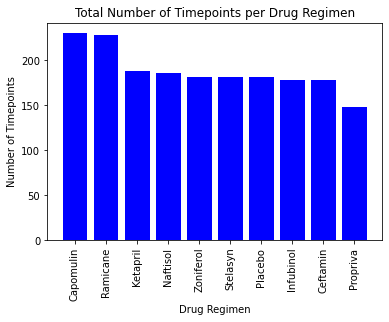

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using using pyplot.

# Create bar chart based upon the above data
x1_axis = drug_test_count_df["Drug Regimen"]
y1_axis = drug_test_count_df["Count"]
plt.bar(x1_axis, y1_axis, color = "blue", align = "center")
# Create the ticks for the bar chart's x axis
tick_locations1 = [value for value in x1_axis]
plt.xticks(tick_locations1, x1_axis, rotation = "vertical")
# Give the chart a title, x label, and y label
plt.title("Total Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

<AxesSubplot:title={'center':'Gender Demographics'}, ylabel='Gender'>

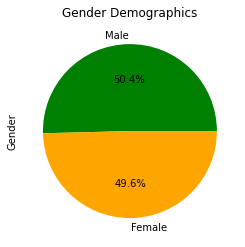

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create dataframe based on "Mouse ID" and "Sex" 
mouse_gender_df = clean_data_df[["Mouse ID", "Sex"]]
# Remove duplicate values
clean_mouse_gender_df = mouse_gender_df.drop_duplicates(keep = "first")
# Create dataframe based on gender counts
gender_count_df = pd.DataFrame(clean_mouse_gender_df["Sex"].value_counts())
# Convert index column to usable data column
gender_count_df.reset_index(level = 0, inplace = True)
# Rename column headers "index" to "Sex" and "Sex" to "Count"
gender_count_df = gender_count_df.rename(columns = {"index":"Sex", "Sex":"Count"})
percent = round(100*(gender_count_df["Count"] / test_subj_count_clean_data),1)
gender_count_df["Percentage"]= percent
# Create pie chart based upon the above data
gender_count_df.plot(y = "Percentage",
                     kind = "pie",
                     subplots = False,
                     colors = ["green", "orange"],
                     legend = False,
                     labels = ["Male", "Female"],
                     title = "Gender Demographics",
                     ylabel = "Gender",
                     autopct = "%1.1f%%")

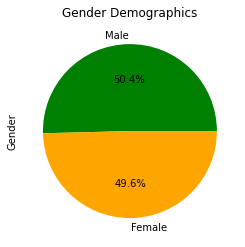

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create pie chart based upon the above data
pies = gender_count_df["Percentage"]
labels = gender_count_df["Sex"]
colors = ["green", "orange"]
plt.pie(pies, labels=labels, colors = colors, autopct="%1.1f%%")
# Give the chart a title, x label, and y label
plt.title("Gender Demographics")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Create a dataframe containing the "Mouse ID" and "Timepoint" information
mouse_timepoint_df = clean_data_df[["Mouse ID", "Timepoint"]]
# Sort the data using "Mouse ID" (ascending) and "Timepoint" (descending) columns 
sorted_mouse_timepoint_df = mouse_timepoint_df.sort_values(by = ["Mouse ID", "Timepoint"],ascending = [True, False])
# Remove duplicate "Mouse ID" rows, keeping only the row with the greatest timepoint value
mouse_maxtimepoint_df = sorted_mouse_timepoint_df.drop_duplicates(subset = "Mouse ID",
                                                                  keep = "first").reset_index(drop = True)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mousedata_at_maxtimepoint_df = pd.merge(mouse_maxtimepoint_df, clean_data_df, on = ["Mouse ID", "Timepoint"],how = "left")

In [15]:
# Put treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Populate the list with tumor vol data
for drug in treatment_list:
    for x in mousedata_at_maxtimepoint_df.index:
        if mousedata_at_maxtimepoint_df.loc[x, "Drug Regimen"] == drug:
            tumor_vol_list.append([drug, mousedata_at_maxtimepoint_df.loc[x, "Tumor Volume (mm3)"]])
# Covert list to dataframe
tumor_vol_list_df = pd.DataFrame(tumor_vol_list, columns = ["Drug Regimen", "Tumor Volume (mm3)"])
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes and create subsets
Capomulin_tumor_vol_list_df = tumor_vol_list_df.loc[tumor_vol_list_df["Drug Regimen"]== "Capomulin", :]
Capomulin_tumor_vol_list_df = Capomulin_tumor_vol_list_df.reset_index(drop=True)

Ramicane_tumor_vol_list_df = tumor_vol_list_df.loc[tumor_vol_list_df["Drug Regimen"]== "Ramicane", :]
Ramicane_tumor_vol_list_df = Ramicane_tumor_vol_list_df.reset_index(drop=True)

Infubinol_tumor_vol_list_df = tumor_vol_list_df.loc[tumor_vol_list_df["Drug Regimen"]== "Infubinol", :]
Infubinol_tumor_vol_list_df = Infubinol_tumor_vol_list_df.reset_index(drop=True)

Ceftamin_tumor_vol_list_df = tumor_vol_list_df.loc[tumor_vol_list_df["Drug Regimen"]== "Ceftamin", :]
Ceftamin_tumor_vol_list_df = Ceftamin_tumor_vol_list_df.reset_index(drop=True)
    
# Determine outliers using upper and lower bounds
Capomulin_quartiles = Capomulin_tumor_vol_list_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

Ramicane_quartiles = Ramicane_tumor_vol_list_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

Infubinol_quartiles = Infubinol_tumor_vol_list_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

Ceftamin_quartiles = Ceftamin_tumor_vol_list_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

Capomulin_outlier = Capomulin_tumor_vol_list_df.loc[(Capomulin_tumor_vol_list_df["Tumor Volume (mm3)"] < Capomulin_lower_bound) |
                                                    (Capomulin_tumor_vol_list_df["Tumor Volume (mm3)"] > Capomulin_upper_bound)]
Ramicane_outlier = Ramicane_tumor_vol_list_df.loc[(Ramicane_tumor_vol_list_df["Tumor Volume (mm3)"] < Ramicane_lower_bound) |
                                                    (Ramicane_tumor_vol_list_df["Tumor Volume (mm3)"] > Ramicane_upper_bound)]
Infubinol_outlier = Infubinol_tumor_vol_list_df.loc[(Infubinol_tumor_vol_list_df["Tumor Volume (mm3)"] < Infubinol_lower_bound) |
                                                    (Infubinol_tumor_vol_list_df["Tumor Volume (mm3)"] > Infubinol_upper_bound)]
Ceftamin_outlier = Ceftamin_tumor_vol_list_df.loc[(Ceftamin_tumor_vol_list_df["Tumor Volume (mm3)"] < Ceftamin_lower_bound) |
                                                    (Ceftamin_tumor_vol_list_df["Tumor Volume (mm3)"] > Ceftamin_upper_bound)]
# Print potential outliers for each drug regimen
print("Capomulin's potential outliers:" + str(Capomulin_outlier["Tumor Volume (mm3)"]))
print("Ramicane's potential outliers:" + str(Ramicane_outlier["Tumor Volume (mm3)"]))
print("Infubinol's potential outliers:" + str(Infubinol_outlier["Tumor Volume (mm3)"]))
print("Ceftamin's potential outliers:" + str(Ceftamin_outlier["Tumor Volume (mm3)"]))

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


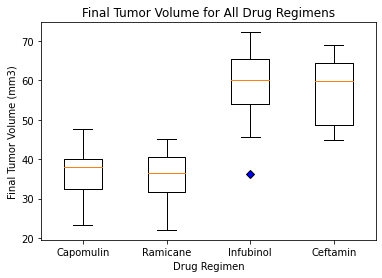

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create boxplots based upon the above data
box_data = [Capomulin_tumor_vol_list_df["Tumor Volume (mm3)"], Ramicane_tumor_vol_list_df["Tumor Volume (mm3)"], 
        Infubinol_tumor_vol_list_df["Tumor Volume (mm3)"], Ceftamin_tumor_vol_list_df["Tumor Volume (mm3)"]]
blue_diamond = dict(markerfacecolor = "blue", marker = "D")
fig, ax = plt.subplots()
ax.boxplot(box_data, labels = treatment_list, flierprops = blue_diamond )
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume for All Drug Regimens")
plt.show()

## Line and Scatter Plots

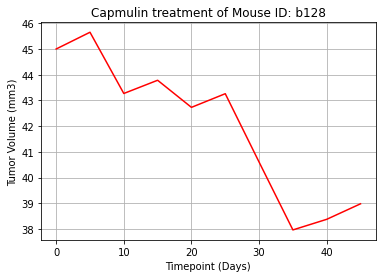

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Save Mouse ID to a variable
mouseID = "b128"
# Create a dataframe based on MouseID = b128 information
mouseID_b128_df = clean_data_df.loc[clean_data_df["Mouse ID"] == mouseID, :]
# Create line chart based upon the above data
timepoint = mouseID_b128_df["Timepoint"]
tumor_volume = mouseID_b128_df["Tumor Volume (mm3)"]
mouseID_b128_line_plot, = plt.plot(timepoint, tumor_volume, color = "red")
# Add title and labels to X and Y axes
plt.title(f"Capmulin treatment of Mouse ID: {mouseID}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
# Add grid lines
plt.grid()
plt.show()

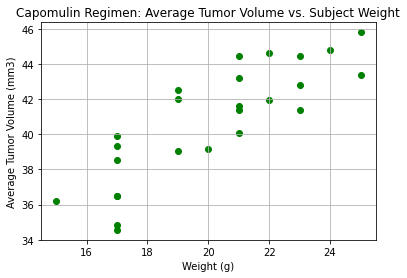

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Save Drug Regimen name to a variable
drug_regimen_ID = "Capomulin"
# Create a dataframe based on Capmulin test information
drug_regimen_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == drug_regimen_ID, :]
# Group data by "Mouse ID" values
grouped_drug_regimen_df = drug_regimen_df.groupby("Mouse ID")
# Calculate average weight and average tumor volume
grouped_ave_weight = grouped_drug_regimen_df["Weight (g)"].mean()
grouped_ave_tumor_volume = grouped_drug_regimen_df["Tumor Volume (mm3)"].mean()
# Create a scatter plot based upon the above data
plt.scatter(grouped_ave_weight, grouped_ave_tumor_volume, color = "green")
# Add title and labels to X and Y axes
plt.title(f"{drug_regimen_ID} Regimen: Average Tumor Volume vs. Subject Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# Add grid
plt.grid()
plt.show()

## Correlation and Regression

The correlation coefficient between Mouse Weight and Average Tumor Volume is 0.84


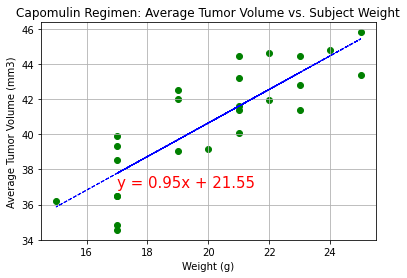

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume is {round(st.pearsonr(grouped_ave_weight, grouped_ave_tumor_volume)[0],2)}")
# Perform a linear regression on Weight versus Average Tumor Volume
regimen_slope, regimen_int, regimen_r, regimen_p, regimen_std_err = st.linregress(grouped_ave_weight,
                                                                                  grouped_ave_tumor_volume)
# Create equation of line to calculate predicted violent crime rate
regimen_fit = regimen_slope * grouped_ave_weight + regimen_int
# Plot the linear model on top of scatter plo
plt.scatter(grouped_ave_weight, grouped_ave_tumor_volume, color = "green")
plt.plot(grouped_ave_weight, regimen_fit, "b--", linewidth = 1)
plt.title(f"{drug_regimen_ID} Regimen: Average Tumor Volume vs. Subject Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
# Add equation line
line_eq = "y = " + str(round(regimen_slope,2)) + "x + " + str(round(regimen_int,2))
plt.annotate(line_eq,(17,37), fontsize = 15, color = "red")
plt.show()